In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s6e2/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s6e2/test.csv")

In [4]:
df_train_id = df_train['id']
df_test_id = df_test['id']

df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  object 
dtypes: f

In [6]:
map_trget = {
    'Absence':0,
    'Presence':1
}

In [7]:
df_train['Heart Disease'] = df_train['Heart Disease'].map(map_trget)

In [8]:
target = 'Heart Disease'
sorted_fetures_importances = (
    df_train.corr()[target]
    .abs()
    .sort_values(ascending=False)
    .drop(target)
)
sorted_fetures_importances

Thallium                   0.605776
Chest pain type            0.460684
Exercise angina            0.441864
Max HR                     0.440985
Number of vessels fluro    0.438604
ST depression              0.430641
Slope of ST                0.415050
Sex                        0.342446
EKG results                0.218961
Age                        0.212091
Cholesterol                0.082753
FBS over 120               0.033570
BP                         0.005181
Name: Heart Disease, dtype: float64

In [9]:
df_train['BP_Chol_Index'] = df_train['BP'] * df_train['Cholesterol'] / 100.0
df_train['HR_Age_Ratio'] = df_train['Max HR'] / (df_train['Age'] + 1)
df_train['ST_Slope_Interaction'] = df_train['ST depression'] * df_train['Slope of ST']
df_train['Vessel_Thal_Score'] = df_train['Number of vessels fluro'] * df_train['Thallium']
df_train['Heart_Stress_Index'] = (df_train['BP'] + df_train['ST depression'] * 10) / (df_train['Max HR'] + 1)

df_test['BP_Chol_Index'] = df_test['BP'] * df_test['Cholesterol'] / 100.0
df_test['HR_Age_Ratio'] = df_test['Max HR'] / (df_test['Age'] + 1)
df_test['ST_Slope_Interaction'] = df_test['ST depression'] * df_test['Slope of ST']
df_test['Vessel_Thal_Score'] = df_test['Number of vessels fluro'] * df_test['Thallium']
df_test['Heart_Stress_Index'] = (df_test['BP'] + df_test['ST depression'] * 10) / (df_test['Max HR'] + 1)

In [10]:
import math
def plot_all_hist(df,title_prefix = ""):
    num_cols= df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols)/n_cols)
    plt.figure(figsize=(5*n_cols,4*n_rows))

    for i, col in enumerate(num_cols,1):
        plt.subplot(n_rows,n_cols,i)
        sns.histplot(df[col],kde=True,bins=30)
        plt.title(f"{title_prefix} {col}")
    plt.tight_layout()
    plt.show()

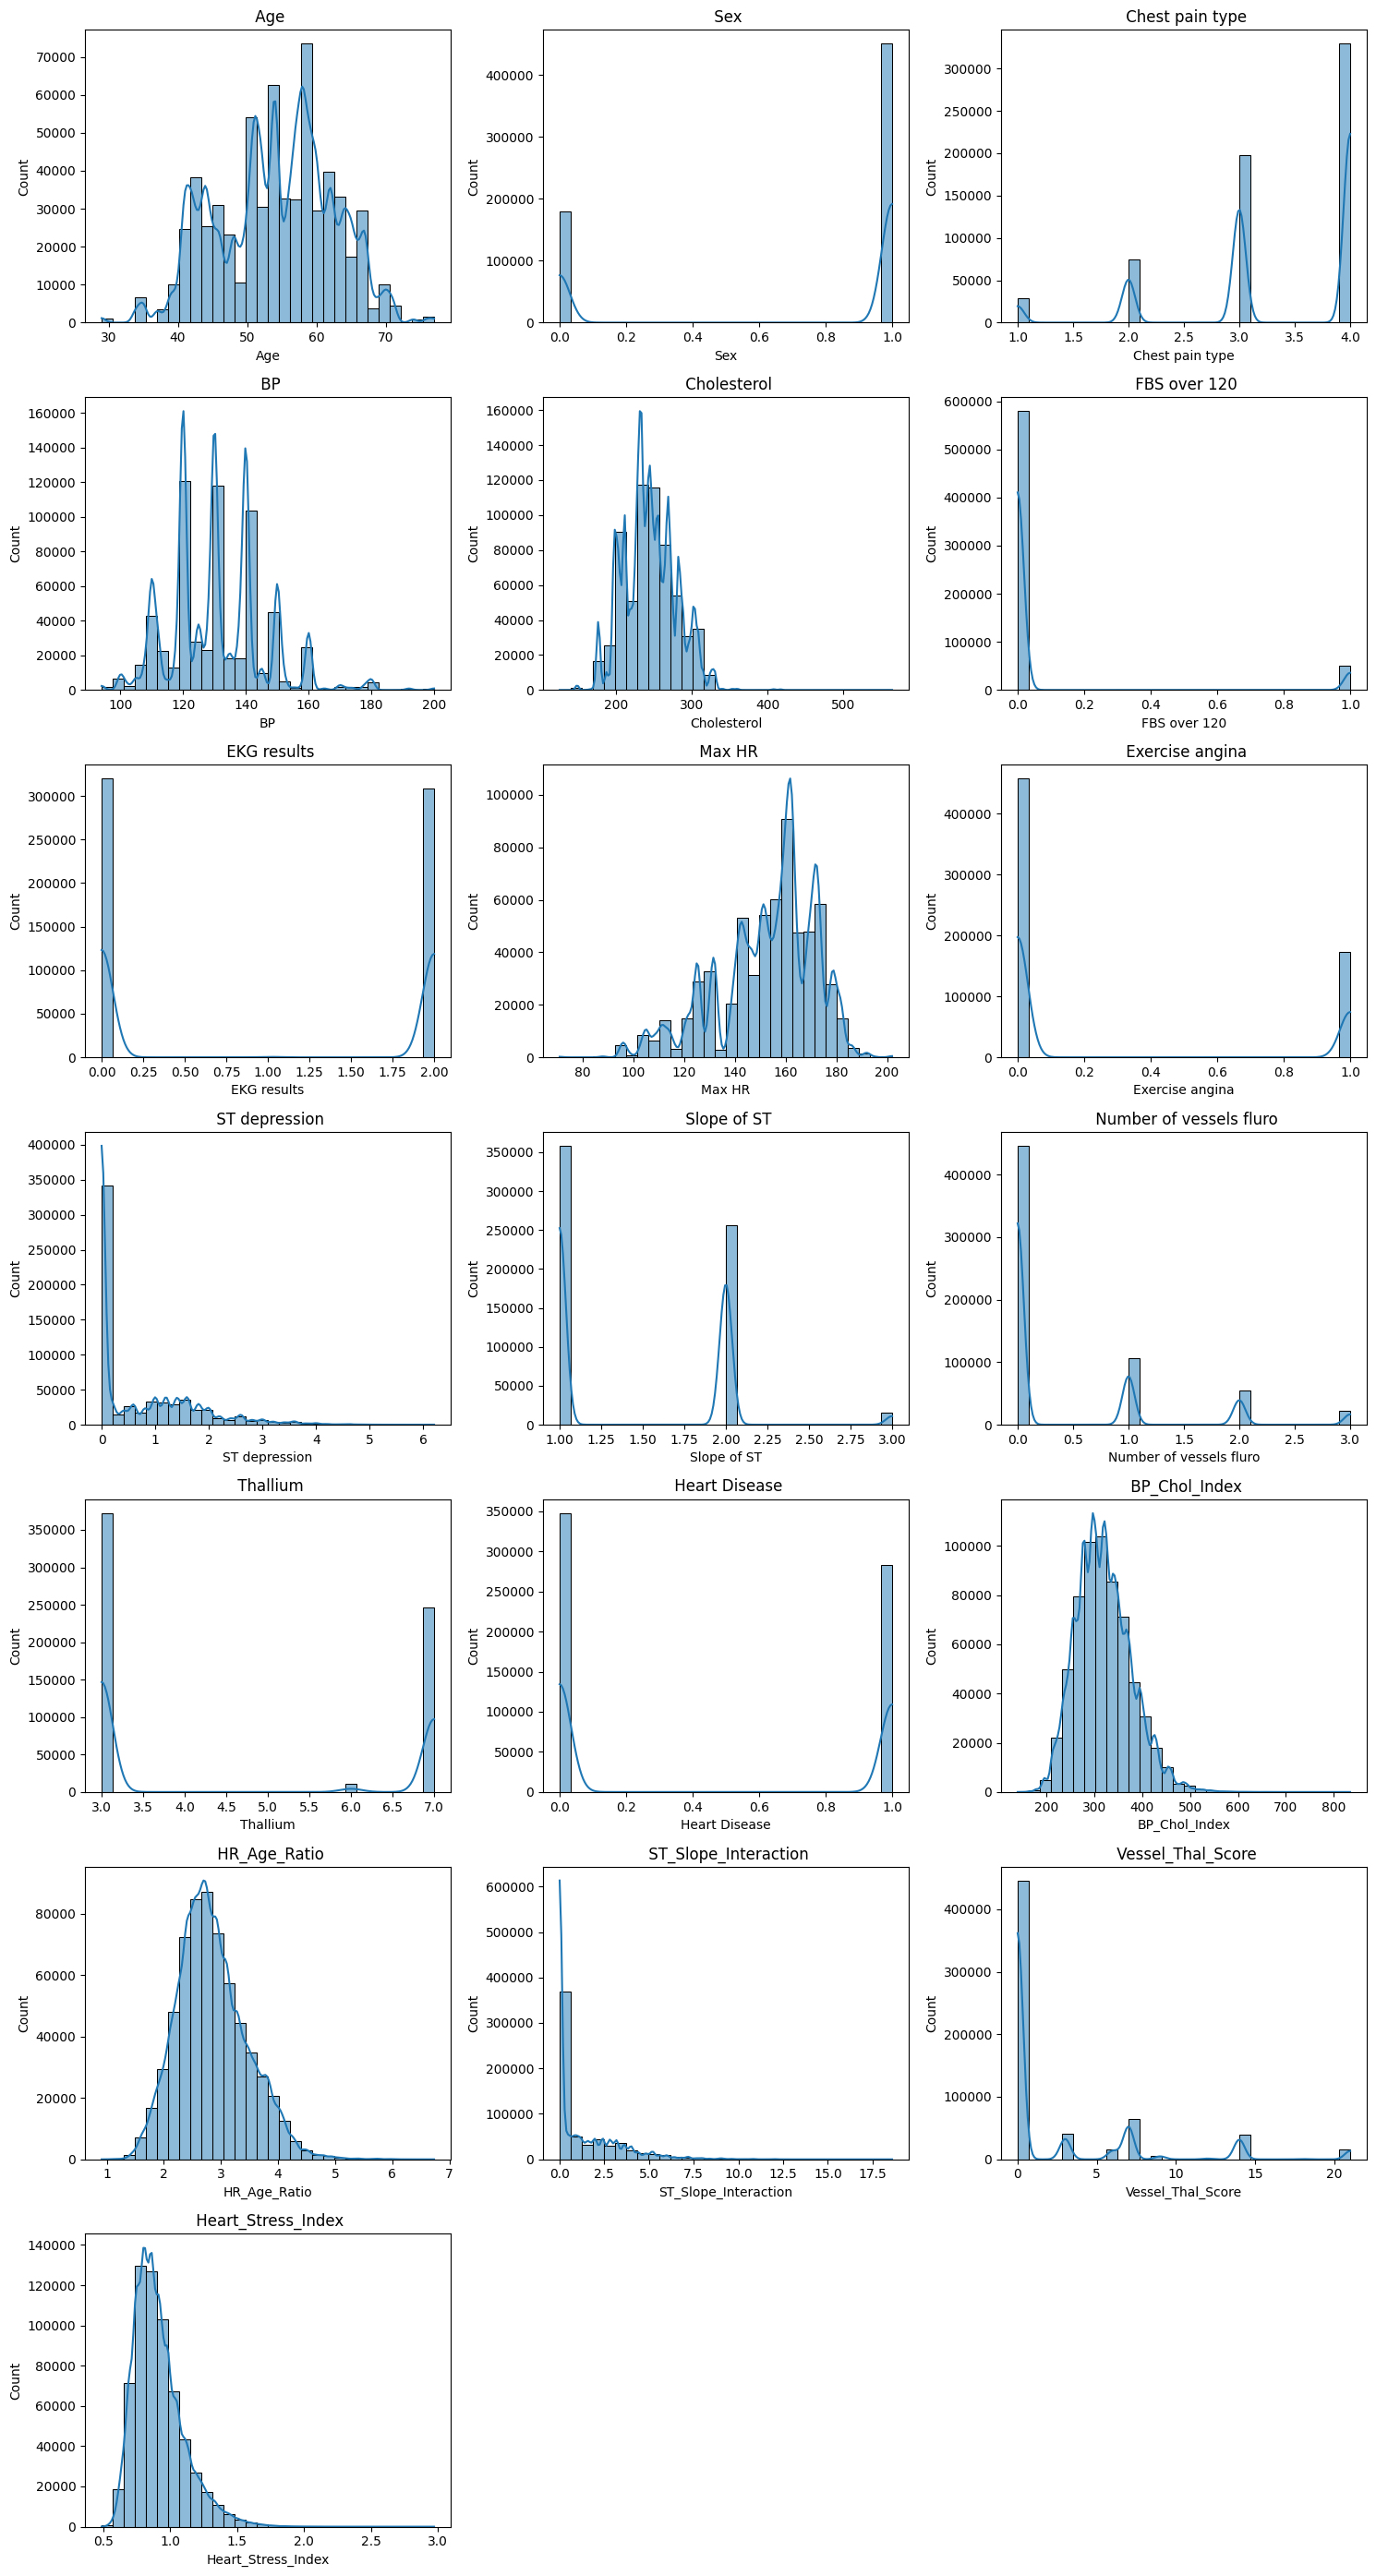

In [11]:
plot_all_hist(df_train)

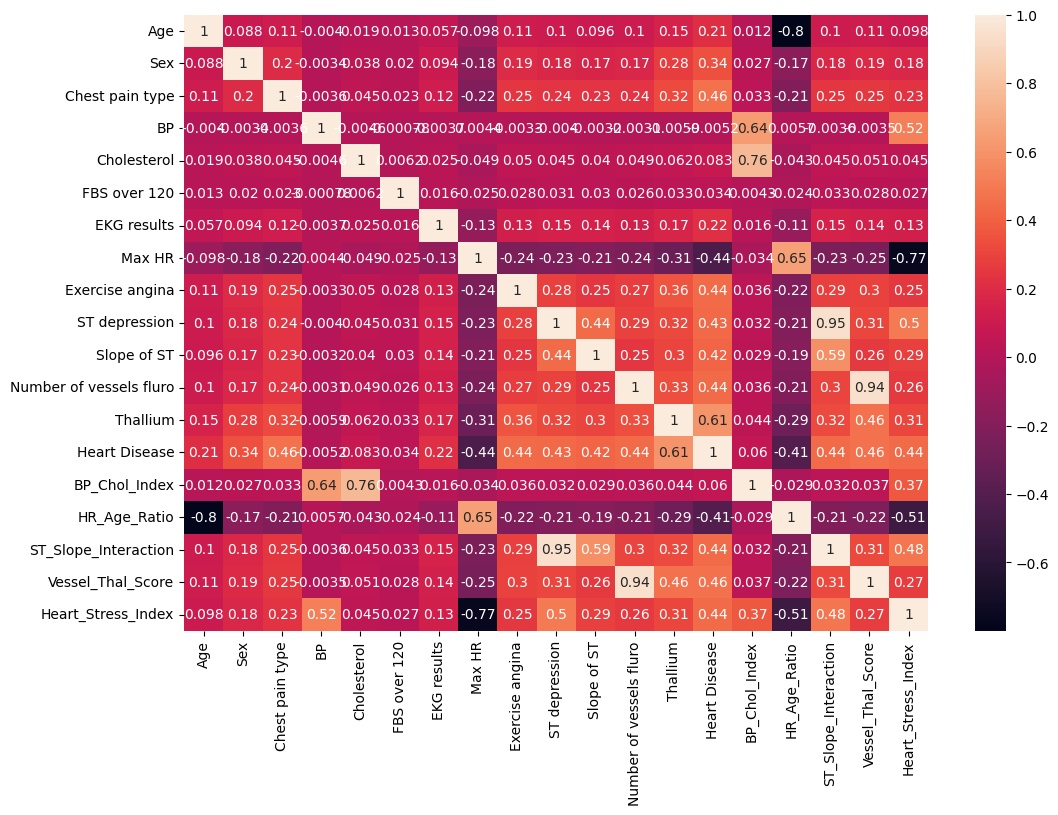

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot = True)
plt.show()

In [13]:
target = 'Heart Disease'
sorted_fetures_importances = (
    df_train.corr()[target]
    .abs()
    .sort_values(ascending=False)
    .drop(target)
)

In [14]:
sorted_fetures_importances

Thallium                   0.605776
Vessel_Thal_Score          0.463177
Chest pain type            0.460684
ST_Slope_Interaction       0.442244
Exercise angina            0.441864
Max HR                     0.440985
Heart_Stress_Index         0.439321
Number of vessels fluro    0.438604
ST depression              0.430641
Slope of ST                0.415050
HR_Age_Ratio               0.411846
Sex                        0.342446
EKG results                0.218961
Age                        0.212091
Cholesterol                0.082753
BP_Chol_Index              0.060110
FBS over 120               0.033570
BP                         0.005181
Name: Heart Disease, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X = df_train.drop(['Heart Disease'],axis=1)
y = df_train['Heart Disease']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)  

In [18]:
scaler = StandardScaler()

In [19]:
X_train_cols = X_train.columns
X_test_cols = X_test.columns
df_test_cols = df_test.columns

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
df_test = scaler.transform(df_test)

In [21]:
X_train = pd.DataFrame(X_train,columns=X_train_cols)
X_test = pd.DataFrame(X_test,columns=X_test_cols)
df_test = pd.DataFrame(df_test,columns=df_test_cols)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

In [23]:
lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    verbose=-1
)


gb = HistGradientBoostingClassifier(
    max_depth=5,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

In [24]:
models = {
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'GradientBoosting': gb
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"{name}: ROC-AUC = {scores.mean():.5f} (+/- {scores.std():.5f})")

XGBoost: ROC-AUC = 0.95510 (+/- 0.00021)
LightGBM: ROC-AUC = 0.95514 (+/- 0.00024)
GradientBoosting: ROC-AUC = 0.95479 (+/- 0.00020)


In [25]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42
    }
    
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    return scores.mean()

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=50, show_progress_bar=True)

print(f"Best ROC-AUC: {study.best_value:.5f}")
print(f"Best params: {study.best_params}")

[I 2026-02-04 18:46:51,191] A new study created in memory with name: no-name-1cd193f1-3cba-47a0-b01d-b37bd616c132


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-04 18:48:06,631] Trial 0 finished with value: 0.9532136599591329 and parameters: {'n_estimators': 562, 'max_depth': 10, 'learning_rate': 0.07587945476302646, 'subsample': 0.8394633936788146, 'colsample_bytree': 0.6624074561769746, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.05808361216819946, 'min_child_weight': 9}. Best is trial 0 with value: 0.9532136599591329.
[I 2026-02-04 18:49:48,392] Trial 1 finished with value: 0.9544627423874301 and parameters: {'n_estimators': 721, 'max_depth': 8, 'learning_rate': 0.011852604486622221, 'subsample': 0.9879639408647978, 'colsample_bytree': 0.9329770563201687, 'reg_alpha': 0.21233911067827616, 'reg_lambda': 0.18182496720710062, 'min_child_weight': 2}. Best is trial 1 with value: 0.9544627423874301.
[I 2026-02-04 18:50:43,236] Trial 2 finished with value: 0.9548818277675244 and parameters: {'n_estimators': 513, 'max_depth': 7, 'learning_rate': 0.048875051677790424, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578

In [26]:
xgb_best = XGBClassifier(**study.best_params, random_state=42)

ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('lgbm', lgbm),
        ('gb', gb)
    ],
    voting='soft',
    weights=[2, 1, 1]
)

ensemble_scores = cross_val_score(ensemble, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"Ensemble Accuracy: {ensemble_scores.mean():.5f} (+/- {ensemble_scores.std():.5f})")
ensemble.fit(X_train, y_train)
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]
print(f"Validation ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.5f}")

test_pred = ensemble.predict_proba(df_test)[:, 1]
submission = pd.DataFrame({'id': df_test_id, 'Heart Disease': test_pred})
submission.to_csv('submission.csv', index=False)
print("Done!")

Ensemble Accuracy: 0.95523 (+/- 0.00022)
Validation ROC-AUC: 0.95512
Done!
